In [2]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from plotting_utils import save_figure
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter("ignore")
from num_cat_transformers import PreprocessingPipeline
from k_means_clusters import cluster_and_visualize
from dimensionality_reduction import pca_reduction, tsne_reduction, umap_reduction

In [3]:
# read the data from the csv file
df = pd.read_csv('/Users/annabzinkowska/DTU/master_thesis/data/processed_data_all_bertopic_vol_2.csv')

In [19]:
len(df)

34131

In [4]:
categorical_columns = ['month_mode']
numerical_columns = []
log_transform_columns = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean']

pipeline = PreprocessingPipeline(categorical_columns, numerical_columns, log_transform_columns)
df_transformed = pipeline.fit_transform(df)
transformed_df_with_headers = pipeline.get_transformed_df()

## PCA

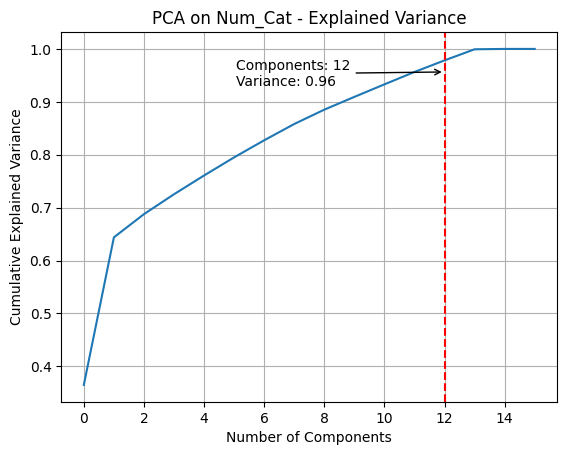

In [22]:
X_pca = pca_reduction(df_transformed, 'Num_Cat')

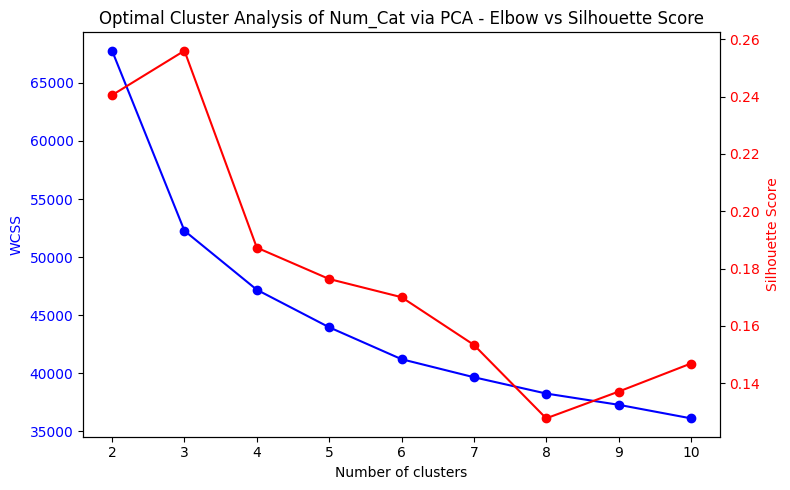

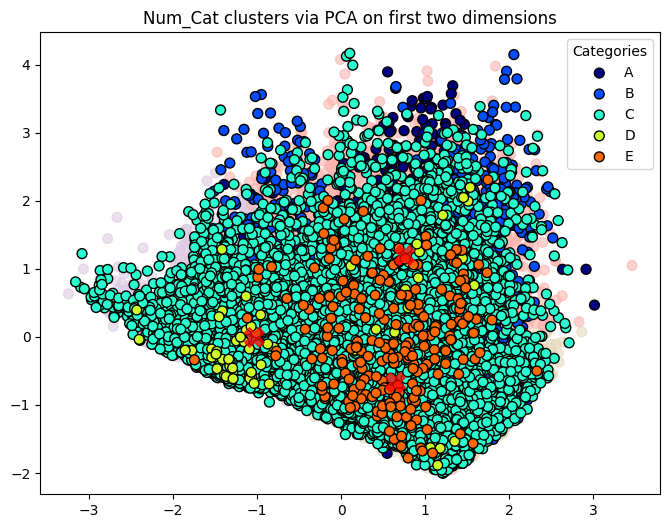

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,topic,category_bertopic,Num_Cat_PCA_Cluster_Labels,Num_Cat_PCA_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,1,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",-1,-1,2,1.300388
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,1,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",-1,-1,2,1.260389
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,1,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",-1,-1,2,1.376543
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,2,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",-1,-1,2,1.352128
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,2,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",-1,-1,2,1.430502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34126,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,20,23,-1,24.6568,SLIDE BEARING ...,-1,-1,0,0.962214
34127,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,2,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",127,C,2,0.729842
34128,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,15,18,-1,11.5649,BOTTOM LINER ...,-1,-1,2,1.203070
34129,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,4,6,-1,198.9262,STEM ...,-1,-1,2,1.096030


In [23]:
cluster_and_visualize(X_pca, df, reduction_method_name='PCA', feature_type='Num_Cat')

## t-SNE

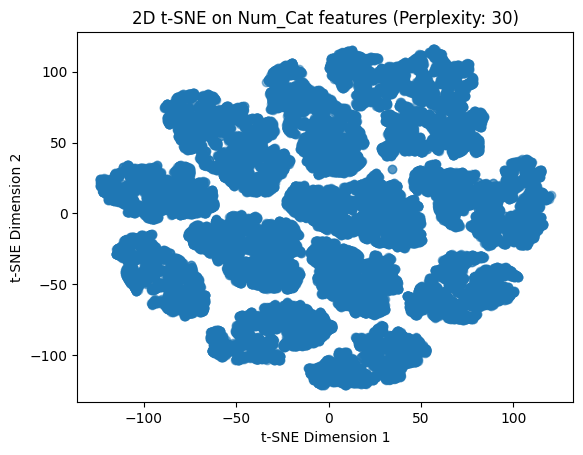

In [5]:
X_tsne = tsne_reduction(df_transformed, 'Num_Cat', perplexity=30, metric='euclidean')

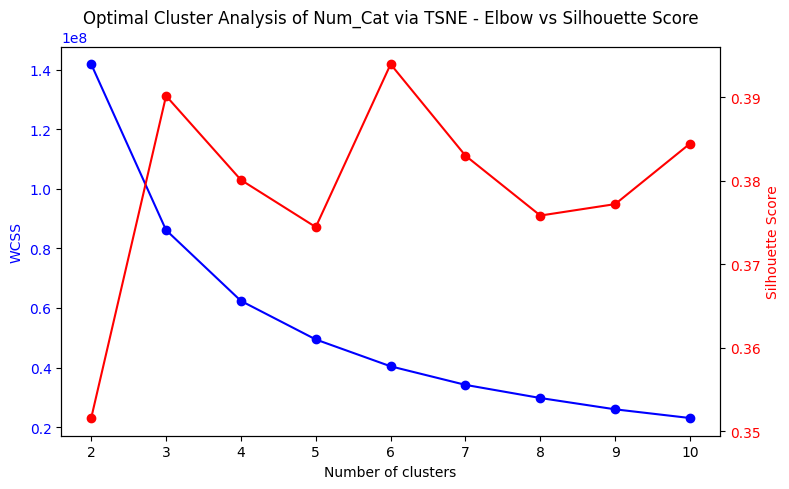

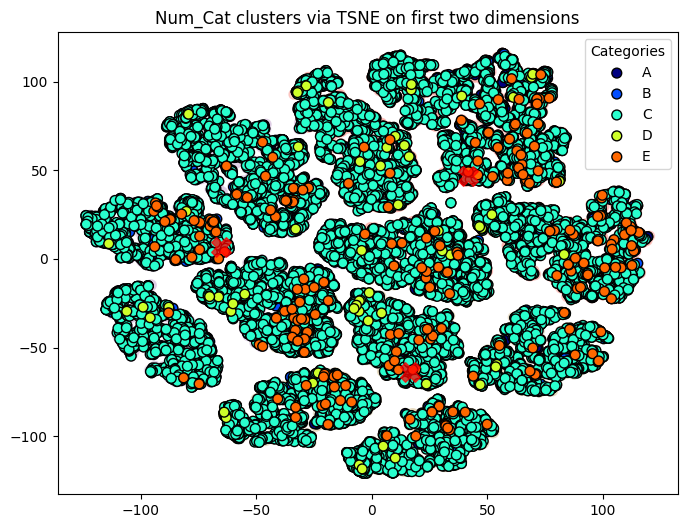

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,topic,category_bertopic,Num_Cat_TSNE_Cluster_Labels,Num_Cat_TSNE_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,1,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",-1,-1,2,50.859928
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,1,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",-1,-1,2,18.355789
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,1,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",-1,-1,2,19.748446
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,2,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",-1,-1,0,80.818703
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,2,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",-1,-1,0,77.745972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34126,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,20,23,-1,24.6568,SLIDE BEARING ...,-1,-1,0,41.194157
34127,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,2,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",127,C,1,77.645454
34128,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,15,18,-1,11.5649,BOTTOM LINER ...,-1,-1,2,18.104116
34129,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,4,6,-1,198.9262,STEM ...,-1,-1,1,28.006947


In [6]:
cluster_and_visualize(X_tsne, df, reduction_method_name='TSNE', feature_type='Num_Cat')

## UMAP

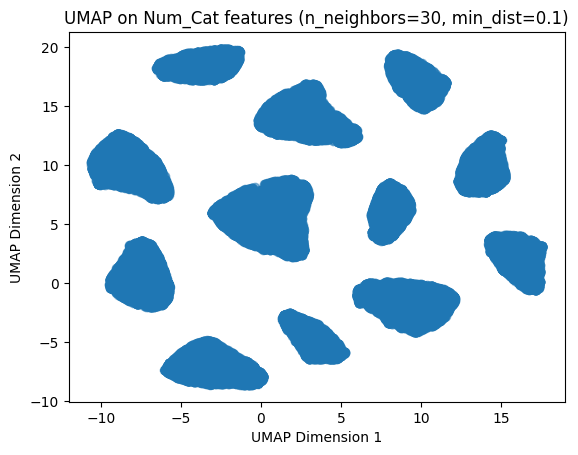

In [8]:
X_umap = umap_reduction(df_transformed, n_neighbors=30, min_dist=0.1, metric='euclidean', feature_type='Num_Cat')

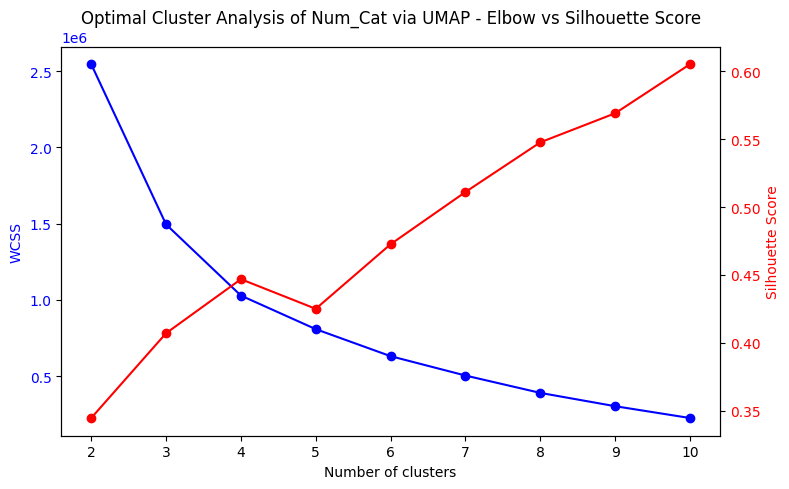

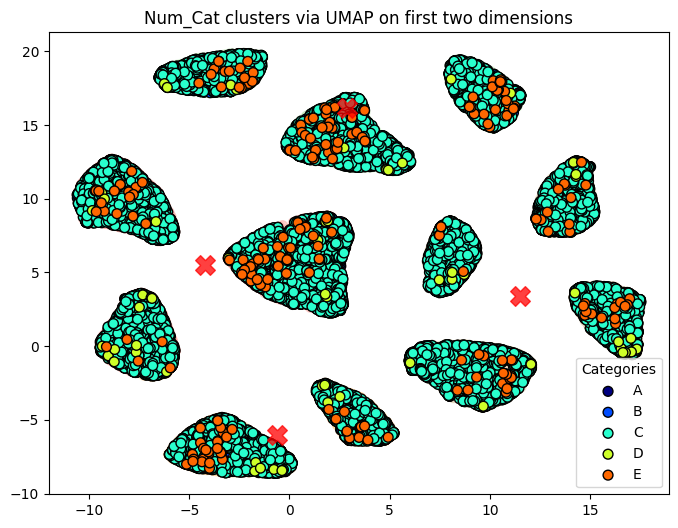

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,...,customer_id_count,category,unit_price_mean,description_original,topic,category_bertopic,Num_Cat_TSNE_Cluster_Labels,Num_Cat_TSNE_Distance_to_Centroid,Num_Cat_UMAP_Cluster_Labels,Num_Cat_UMAP_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,...,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",-1,-1,2,50.859928,0,8.112933
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,...,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",-1,-1,2,18.355789,3,4.208694
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,...,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",-1,-1,2,19.748446,3,4.306962
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,...,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",-1,-1,0,80.818703,1,2.037413
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,...,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",-1,-1,0,77.745972,1,1.676064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34126,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,...,23,-1,24.6568,SLIDE BEARING ...,-1,-1,0,41.194157,0,4.983237
34127,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,...,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",127,C,1,77.645454,3,5.993990
34128,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,...,18,-1,11.5649,BOTTOM LINER ...,-1,-1,2,18.104116,3,4.231640
34129,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,...,6,-1,198.9262,STEM ...,-1,-1,1,28.006947,3,4.209915


In [9]:
cluster_and_visualize(X_umap, df, reduction_method_name='UMAP', feature_type='Num_Cat')

In [19]:
# write df to data folder with name df_Num_Cat_clusters.csv
# df.to_csv('../data/df_Num_Cat_clusters_vol_2.csv', index=False)